Realizar un algoritmo que aplique las transformaciones y operaciones necesarias para segmentar la imagen monedas1.jpg, 
etiquetar cada área que ocupa una moneda como una región y contar automáticamente la cantidad de monedas en la imagen.
El código escrito debe funcionar correctamente para otra imagen de monedas. Cree su propio banco de imágenes y verifique
el algoritmo.

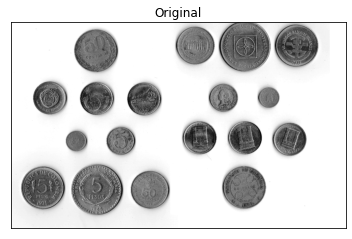

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("monedas+manzanas/monedas1.jpg",0)
plt.xticks([]),plt.yticks([])
plt.title('Original')
plt.imshow(img, cmap = 'gray')

El umbral es:  200.0


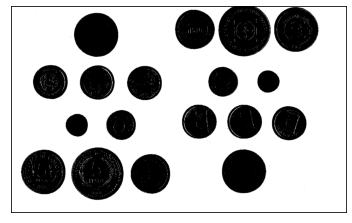

In [2]:
## Umbraización mediante meétodo de umbral simple
umbral, imgBin = cv.threshold (img, 200,255, cv.THRESH_BINARY)

plt.xticks([]),plt.yticks([])
plt.imshow(imgBin, cmap = 'gray')
print('El umbral es: ',umbral)

Imagen Negativa


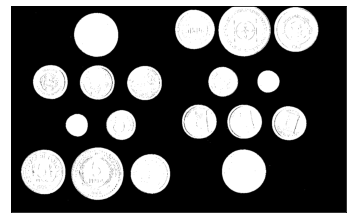

In [3]:
imgBin= 255-imgBin
plt.xticks([]),plt.yticks([])
plt.imshow(imgBin, cmap = 'gray')
print('Imagen Negativa')

In [4]:
conectividad = 4
## salida es una tupla con 4 celdas
salida = cv.connectedComponentsWithStats(imgBin,umbral,conectividad)
#
## La primera celda contiene el numero de etiquetas
nEtiquetas = salida[0]
#
## La segunda celda contiene la matriz de etiquetas
imgEtiquetas = salida[1]
#
## La tercera celda contiene la matriz de estadisticas de cada region
estadisticas = salida[2]
#

In [5]:

centroides = salida[3]
#
## centroides es una matriz con las ubicaciones x e y de cada centroide. 
## La fila en dicha matriz corresponde al número de etiqueta.
#
#
############ Vamos a obtener una imagen con solo la region con el área  mayor  #########
#
## Se toma la posición de la región de mayor área
pos_max =np.argmax(estadisticas[:,cv.CC_STAT_AREA])
#
## se toman las coordenadas del centroide de la region de mayor área
f,c = np.rint(centroides[pos_max])
f = f.astype('int')
c = c.astype('int')
#
## Se obtiene la etiqueta (numero entero) de la region de mayor area
etiquetaMayor = imgEtiquetas[f,c]
#
## Se crea una imagen binaria solo con la region de mayor area
regionMayor = ((imgEtiquetas == etiquetaMayor)*1.0).astype('uint8')
#
#####################################################################
#
#############Eliminar los agujeros en la imagen
#
## Se hace una copia de la imagen binaria con la region de mayor area
cp_regionMayor1 = regionMayor.copy()
#
## Máscara  para realizar el relleno.
## el tamaño debe ser  2 píxeles mayor que la imagen.
#
h, w = regionMayor.shape[:2]
mascara = np.zeros((h+2, w+2), np.uint8)
## Se rellena desde la imagen desde el punto (0,0)
cv.floodFill(cp_regionMayor1, mascara, (0,0), 255)
#
## Se invierte la imagen rellena
cp_regionMayor1_inv = cv.bitwise_not(cp_regionMayor1)
#
## Se combinan las dos imagenes para obtener el primer plano
im_areaMayor = regionMayor | cp_regionMayor1_inv
##################################################################
#
## Se hace una copia de la imagen binaria con la region de mayor area
cp_regionMayor2 = im_areaMayor.copy()
## Se calcula el contorno de dicha la mayor area
contorno, jerarquia = cv.findContours(cp_regionMayor2, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

## Se crea una imagen con el contorno obtenido atras
#imgContorno = cv2.drawContours (cp_regionMayor2,contorno, -1, (100,255,50), 3)
imgNueva = np.zeros((h,w)).astype('uint8') # Imagen de fondo para ver solo  el contorno
imgContorno = cv.drawContours (imgNueva,contorno, -1, (100,255,50), 2)


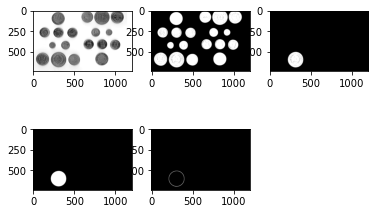

In [6]:
plt.subplot(231)
plt.imshow(img,'gray');
plt.subplot(232)
plt.imshow(imgBin,'gray');
plt.subplot(233)
plt.imshow(regionMayor,'gray')
plt.subplot(234)
plt.imshow(im_areaMayor,'gray')
plt.subplot(235)
plt.imshow(imgContorno,'gray')


In [7]:
import pandas as pd
tablaStat = pd.DataFrame(estadisticas, columns = ['Left','Top','Width','Height','Area'])



In [8]:
tablaMonedas = tablaStat[tablaStat["Area"]>=4000]

In [9]:
cantidadMonedas=tablaMonedas.Area.count()
print('Numero de monedas ',cantidadMonedas)


Numero de monedas  19


Escribir los algoritmos necesarios para segmentar las monedas en la imagen monedas2.jpg, extraer bordes, binarizar, aplicar operadores morfológicos (erosión, dilatación, apertura o cierre) de tal forma que se obtenga el patrón más claro posible para cada cara.


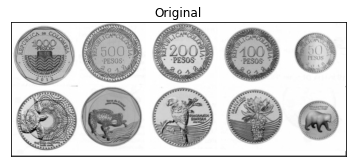

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("monedas+manzanas/monedas2.jpg",0)
plt.xticks([]),plt.yticks([])
plt.title('Original')
plt.imshow(img, cmap = 'gray')

El umbral es:  127.0


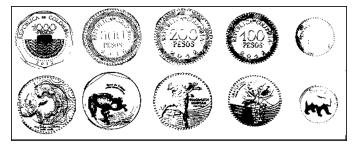

In [11]:
#Binarizamos la imagen
umbral, imgBin = cv.threshold (img, 127,255, cv.THRESH_BINARY)

plt.xticks([]),plt.yticks([])
plt.imshow(imgBin, cmap = 'gray')
print('El umbral es: ',umbral)

In [12]:
def erosion(imgBin):
    # Se crea el Kernel o elementos estructurante
    kernel = np.ones((9,9),np.uint8)

    # se aplica el operador
    erosion = cv.erode(imgBin,kernel,iterations = 2)
def dilatacion(img):
    kernel = np.ones((9,9),np.uint8)

    # se aplica el operador de dilatación
    dilatacion = cv.dilate (img, kernel, iterations = 2)
    #mostramos el resultados
    return dilatacion 
def cierre(img):
    kernel = np.ones((7,7),np.uint8)
    #erosion = cv.erode(imgbin,kernel,iterations = 1)
    cierre = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
    return cierre
def apertura(img):
    kernel = np.ones((3,3),np.uint8)
    #erosion2 = cv.erode(imgbin2,kernel,iterations = 1)
    apertura = cv.morphologyEx (img, cv.MORPH_OPEN, kernel)
    return apertura

Los bordes de la imagen


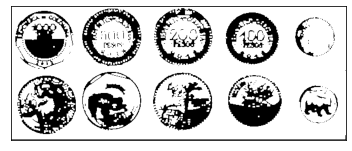

In [13]:
#Aplicamos erosion
img= apertura(imgBin)
plt.xticks([]),plt.yticks([])
plt.imshow(img, cmap = 'gray')

print('Los bordes de la imagen')

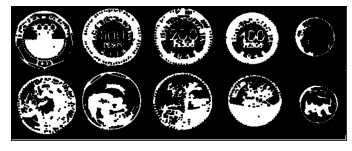

In [14]:

img= apertura(imgBin)
img =255-img
plt.xticks([]),plt.yticks([])
plt.imshow(img, cmap = 'gray')
